In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('./smoking_driking_dataset.csv')

# shfaq te informatat per datasetin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [93]:
# Drop columns that we don't need
columns_to_drop = ['waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'serum_creatinine', 'urine_protein']
df = df.drop(columns=columns_to_drop)

print("DataFrame after dropping columns:")
print(df)

DataFrame after dropping columns:
           sex  age  height  weight    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0         Male   35     170      75  120.0  80.0   99.0      193.0       48.0   
1         Male   30     180      80  130.0  82.0  106.0      228.0       55.0   
2         Male   40     165      75  120.0  70.0   98.0      136.0       41.0   
3         Male   50     175      80  145.0  87.0   95.0      201.0       76.0   
4         Male   50     165      60  138.0  82.0  101.0      199.0       61.0   
...        ...  ...     ...     ...    ...   ...    ...        ...        ...   
991341    Male   45     175      80  114.0  80.0   88.0      198.0       46.0   
991342    Male   35     170      75  119.0  83.0   83.0      133.0       40.0   
991343  Female   40     155      50  110.0  70.0   90.0      205.0       96.0   
991344    Male   25     175      60  119.0  74.0   69.0      122.0       38.0   
991345    Male   50     160      70  133.0  79.0   99.0      225.0       39

In [94]:
import great_expectations as gx

context = gx.get_context()

validator = context.sources.pandas_default.read_csv(
    "./smoking_driking_dataset.csv"
)

In [95]:
validator.expect_column_values_to_be_between(column='age', min_value=20, max_value=90)

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 991346,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [96]:
validator.expect_column_values_to_be_in_set(column='sex', value_set=['Male', 'Female'])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 991346,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [97]:
validator.expect_column_values_to_be_in_set(column='DRK_YN', value_set=['Y', 'N'])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 991346,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [98]:
validator.expect_column_values_to_be_in_set(column='SMK_stat_type_cd', value_set=[1.0, 2.0,3.0])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 991346,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [99]:
#DUPLICATION
duplicates = df[df.duplicated(keep='first')]
print("First occurrences of duplicates:")
print(duplicates)

First occurrences of duplicates:
           sex  age  height  weight    SBP    DBP   BLDS  tot_chole  \
159911  Female   40     170      85  120.0   70.0  110.0      191.0   
175152    Male   65     170      75  130.0   70.0  114.0      175.0   
246305  Female   50     155      70  150.0   96.0  101.0      230.0   
280830    Male   45     170      75  150.0   78.0  195.0      222.0   
284528  Female   65     150      55  120.0   65.0   99.0      228.0   
290463  Female   20     160      50  106.0   68.0   76.0      154.0   
335747    Male   50     180      95  177.0  111.0  141.0      184.0   
429596    Male   75     160      60  105.0   70.0  114.0      218.0   
453451    Male   35     170      65  130.0   78.0   99.0      149.0   
471596  Female   45     165      65  120.0   80.0   87.0      178.0   
479756    Male   50     165      65  115.0   75.0   96.0      219.0   
555137    Male   30     165      95  122.0   79.0   92.0      243.0   
558263  Female   65     145      50  154.0  

In [100]:
# Removing duplicates
df = df.drop_duplicates()

print(df)

           sex  age  height  weight    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0         Male   35     170      75  120.0  80.0   99.0      193.0       48.0   
1         Male   30     180      80  130.0  82.0  106.0      228.0       55.0   
2         Male   40     165      75  120.0  70.0   98.0      136.0       41.0   
3         Male   50     175      80  145.0  87.0   95.0      201.0       76.0   
4         Male   50     165      60  138.0  82.0  101.0      199.0       61.0   
...        ...  ...     ...     ...    ...   ...    ...        ...        ...   
991341    Male   45     175      80  114.0  80.0   88.0      198.0       46.0   
991342    Male   35     170      75  119.0  83.0   83.0      133.0       40.0   
991343  Female   40     155      50  110.0  70.0   90.0      205.0       96.0   
991344    Male   25     175      60  119.0  74.0   69.0      122.0       38.0   
991345    Male   50     160      70  133.0  79.0   99.0      225.0       39.0   

        LDL_chole  triglyce

In [101]:
# Completeness
#identifiko te dhenat null
print('te dhenat null')
df.isnull().sum()

te dhenat null


sex                 0
age                 0
height              0
weight              0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [102]:
# Aggregation: Calculate average cholesterol levels for each smoking category
agg_result = df.groupby('SMK_stat_type_cd').agg({
    'tot_chole': 'mean',
    'HDL_chole': 'mean',
    'LDL_chole': 'mean',
    'triglyceride': 'mean'
}).reset_index()

# Display the aggregated result
print("\nAggregated Result:")
print(agg_result)


Aggregated Result:
   SMK_stat_type_cd   tot_chole  HDL_chole   LDL_chole  triglyceride
0               1.0  195.336580  59.258167  113.363826    115.054869
1               2.0  194.950647  53.824927  112.836216    147.418242
2               3.0  196.672411  52.945692  112.282886    167.755722


In [103]:
agg_result = df.groupby(['SMK_stat_type_cd', 'sex']).agg({
    'tot_chole': 'mean',
    'HDL_chole': 'mean',
    'LDL_chole': 'mean',
    'triglyceride': 'mean'
}).reset_index()

# Display the aggregated result
print("\nAggregated Result:")
print(agg_result)


Aggregated Result:
   SMK_stat_type_cd     sex   tot_chole  HDL_chole   LDL_chole  triglyceride
0               1.0  Female  196.580444  61.537568  113.561781    107.900007
1               1.0    Male  192.030149  53.199083  112.837624    134.073864
2               2.0  Female  194.461820  64.006409  108.393060    111.602362
3               2.0    Male  194.983197  53.146956  113.132080    149.803173
4               3.0  Female  195.129801  62.922021  107.716950    126.038282
5               3.0    Male  196.799193  52.125773  112.658144    171.184328


In [104]:
bins = [20, 40, 60, 80, 100]
labels = ['20-40', '40-60', '60-80', '80-100']
df['Age_Binned'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

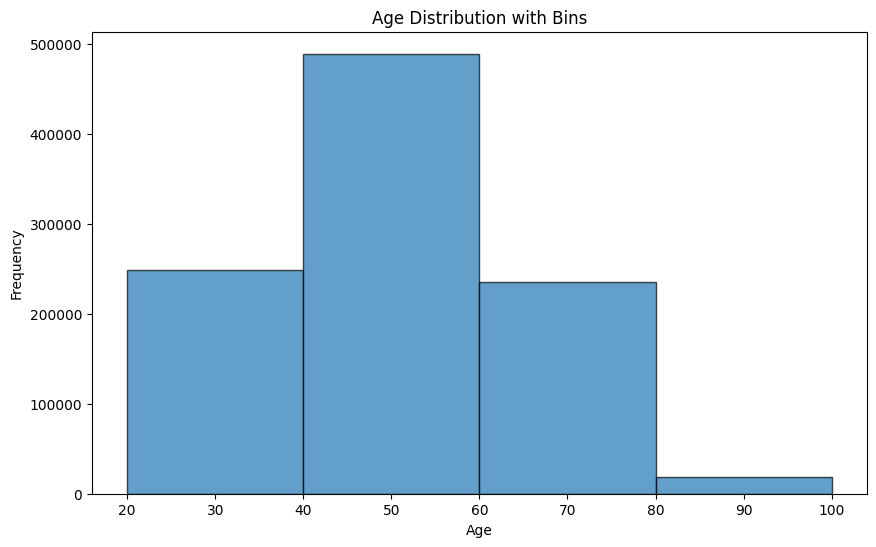

In [105]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Age Distribution with Bins')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [106]:
df = df.drop(columns=['age'])
print(df)

           sex  height  weight    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0         Male     170      75  120.0  80.0   99.0      193.0       48.0   
1         Male     180      80  130.0  82.0  106.0      228.0       55.0   
2         Male     165      75  120.0  70.0   98.0      136.0       41.0   
3         Male     175      80  145.0  87.0   95.0      201.0       76.0   
4         Male     165      60  138.0  82.0  101.0      199.0       61.0   
...        ...     ...     ...    ...   ...    ...        ...        ...   
991341    Male     175      80  114.0  80.0   88.0      198.0       46.0   
991342    Male     170      75  119.0  83.0   83.0      133.0       40.0   
991343  Female     155      50  110.0  70.0   90.0      205.0       96.0   
991344    Male     175      60  119.0  74.0   69.0      122.0       38.0   
991345    Male     160      70  133.0  79.0   99.0      225.0       39.0   

        LDL_chole  triglyceride  hemoglobin  SMK_stat_type_cd DRK_YN  \
0           126

In [116]:
bins = [60, 90, 130, 200]
labels = ['Low', 'Normal', 'High']
df['BLDS_Category'] = pd.cut(df['BLDS'], bins=bins, labels=labels, right=False)


# Display the DataFrame after discretization
print("DataFrame after Discretization:")
print(df)

DataFrame after Discretization:
           sex  height  weight    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0         Male     170      75  120.0  80.0   99.0      193.0       48.0   
1         Male     180      80  130.0  82.0  106.0      228.0       55.0   
2         Male     165      75  120.0  70.0   98.0      136.0       41.0   
3         Male     175      80  145.0  87.0   95.0      201.0       76.0   
4         Male     165      60  138.0  82.0  101.0      199.0       61.0   
...        ...     ...     ...    ...   ...    ...        ...        ...   
991341    Male     175      80  114.0  80.0   88.0      198.0       46.0   
991342    Male     170      75  119.0  83.0   83.0      133.0       40.0   
991343  Female     155      50  110.0  70.0   90.0      205.0       96.0   
991344    Male     175      60  119.0  74.0   69.0      122.0       38.0   
991345    Male     160      70  133.0  79.0   99.0      225.0       39.0   

        LDL_chole  triglyceride  hemoglobin  SMK_stat_t

In [108]:
# Binarize those two columns and convert into numbers 0 and 1
df_onehot = pd.get_dummies(df, columns=['sex', 'DRK_YN'], drop_first=True)

In [109]:
df_onehot

,height,weight,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,SMK_stat_type_cd,Age_Binned,sex_Male,DRK_YN_Y
0,170,75,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,20-40,1,1
1,180,80,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,3.0,20-40,1,0
2,165,75,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,40-60,1,0
3,175,80,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,40-60,1,0
4,165,60,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,40-60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,175,80,114.0,80.0,88.0,198.0,46.0,125.0,132.0,15.0,1.0,40-60,1,0
991342,170,75,119.0,83.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,20-40,1,0
991343,155,50,110.0,70.0,90.0,205.0,96.0,77.0,157.0,14.3,3.0,40-60,0,1
991344,175,60,119.0,74.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,20-40,1,0
